In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.casedeck import *

%load_ext autoreload
%autoreload 2

In [2]:
case_dir = r"/ssd_scratch/cases"
casepaths = dict()
cases = []
for input_file in Path(case_dir).rglob('BOUT.inp'):
    casepaths[input_file.parent.name] = input_file.parent
    cases.append(input_file.parts[-2])

In [3]:
db = CaseDB(
    case_dir = r"/ssd_scratch/cases",
    grid_dir = r"/ssd_scratch/cases"
    )


In [4]:
case = Load.case_1D(db.casepaths["hraf-c5-1-s"])

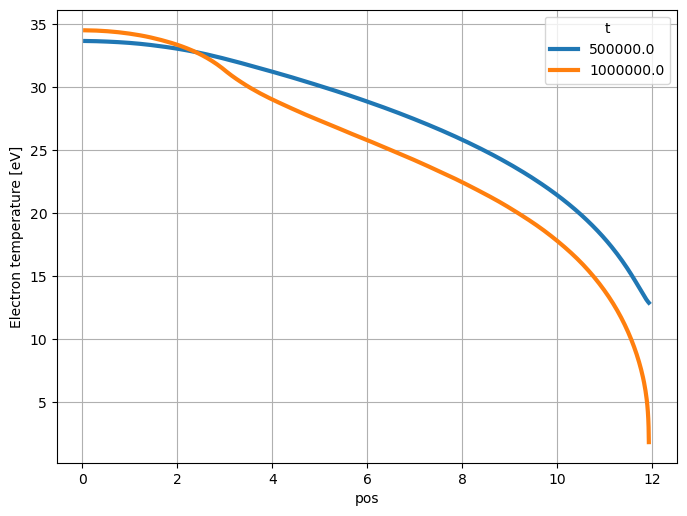

In [5]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 100)

ds = case.ds.isel(pos = slice(2,-2))

ds["Te"].isel(t=[0,-1]).plot.line(ax = ax, x="pos", lw = 3)
ax.grid()
ax.set_yscale("linear")

In [6]:
Monitor(case, )

TypeError: __init__() missing 1 required positional argument: 'windows'

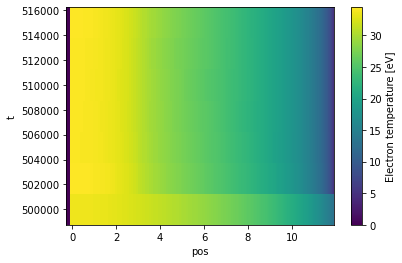

In [ ]:
case.ds["Te"].plot()

In [ ]:
deck = CaseDeck1D(r"/ssd_scratch/cases", key = "hraf-c5", skip = "", verbose = True)


>>> All cases in path: ['6as-b25n60r1-1', '6js-b25n60-1', '6as-b20-1', '6as-d-1', '6as-b25n60r16-1', '6as-b15-1', '6jso-b25n60-1', '6hs-d-1', 'ut-500', '6as-b25-1', '6aso-b25n60-1', '6as-n60-1', '6bs-d-1', '6as-b25n60-1', '6gs-b25n60-1', '6is-b1n60-1', '6is-b10n60-1', '6iso-b25n60-1', 'ut-1000', 'uniformtest', '6is-b25n60-1', '6as-b25n60-1-cfthr', '1as-b25n60-1', '6aso-d-1', '6gso-b25n60-1', '6gs-d-1', '6as-b25n60r4-1', '6as-b25n60a0-1', 'ma1-c1-1', 'ma3-c1-4-bckup', 'ma3-c1-4', 'ma3-c2-1', 'ma2-c1-1', 'ma3-c1-1', 'ma3-c3-1', 'ma3-c4-1', 'ma1-c1-4', 'ma3-c1-2', 'ma4-c1-4', 'c', 'recycling1d-oldmaster', 'mbalancetest', 'hraf-c5-3', 'ta2-nopi', 'hrac-c5-10-fixbc', 'neut_test2', 'recycling1d', 'recycling1d_pi', 'hrac-c5-5-ftest', 'dntest', 'recycling1d-master', 'b', 'hrac-c4-5', 'hrac-c5-5', 'hraf-c5-1', 'hrac-c5-10', 'hrac-c1-5', 'ta1-fromrecycling', 'hraf-c5-2', 'hraf-c5-7', 'hrac-c1-10', 'ta3-noneutbc', 'neut_test', 'hraf-c5-10', 'a', 'hraf-c5-5', 'hrac-c3-5', 'ct1b-hitstep', 'bt8-str

In [ ]:
deck.get_stats()

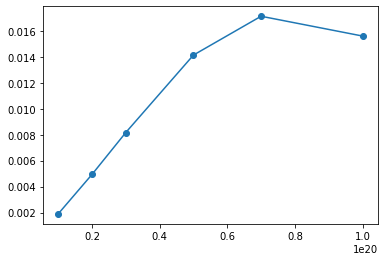

In [ ]:
plt.plot(deck.stats["initial_dens"], deck.stats["target_flux"], "o-")

/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


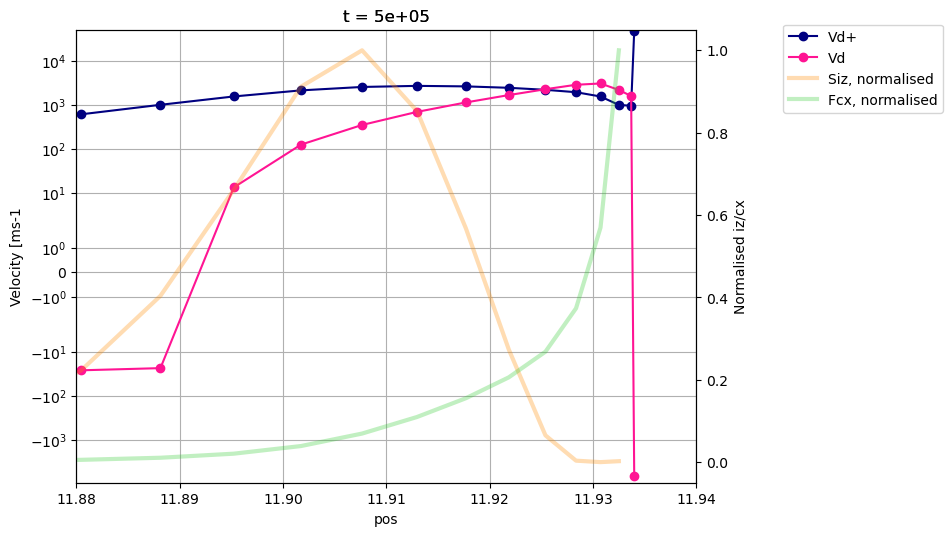

In [ ]:
case = Load.case_1D(db.casepaths["hraf-c5-10"])

c = case.ds.isel(t=-1)

fig, ax = plt.subplots(figsize = (8,6), dpi = 100)

# c["Td+"].plot(ax = ax, label = "Ti", color = "navy")
# c["Td"].plot(ax = ax, label = "Tn", color = "deeppink")

(c["NVd+"]/c["Ne"]/(constants("mass_p")*2)).plot(ax = ax, label = "Vd+", color = "navy", marker = "o")
(c["NVd"]/c["Ne"]/(constants("mass_p")*2)).plot(ax = ax, label = "Vd", color = "deeppink", marker = "o")
ax.set_ylabel("Velocity [ms-1")
# 
# (c["NVd+"]).isel(pos=slice(0,-1)).plot(ax = ax, label = "NVd+", color = "navy", marker = "o")
# (c["NVd"]).isel(pos=slice(0,-1)).plot(ax = ax, label = "NVd", color = "deeppink", marker = "o")
# ax.set_ylabel("Momentum [kgms-1]")

ax2 = ax.twinx()

def process(x):
    x = x.isel(pos=slice(2,-3))
    
    x = abs(x) / max(abs(x))
    return x

process(c["Sd+_iz"]).plot(ax=ax2, label = "Siz, normalised", color = "darkorange", lw=3, alpha = 0.3)
process(c["Fdd+_cx"]).plot(ax=ax2, label = "Fcx, normalised", color = "limegreen", lw=3, alpha = 0.3)
# (abs(c["Sd+_iz"])/max(abs(c["Sd+_"]))).plot(ax=ax2, label = "Fcx", color = "darkorange")


ax2.set_ylabel("Normalised iz/cx")
ax.set_yscale("symlog")
ax.set_xlim(11.88,11.94)
# ax.set_ylim(0,5000)
ax.grid()
fig.legend(loc="upper left", bbox_to_anchor=(1,0.9))

In [ ]:
case = Load.case_1D(db.casepaths["hraf-c5-10"])

In [ ]:
case.ds["Ne"].shape

(201, 204)

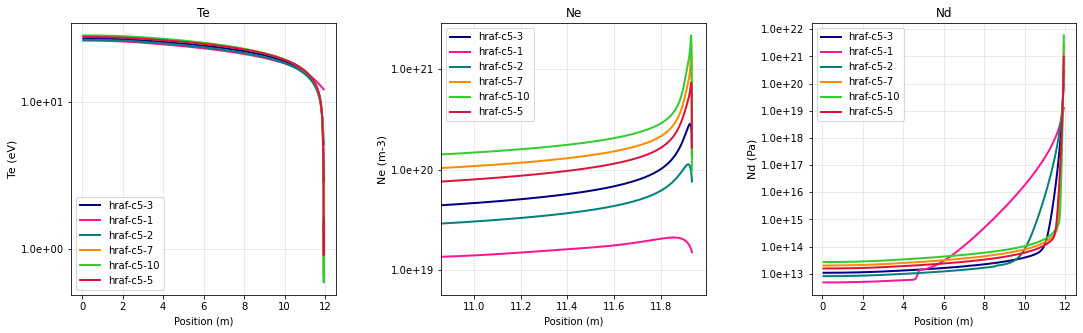

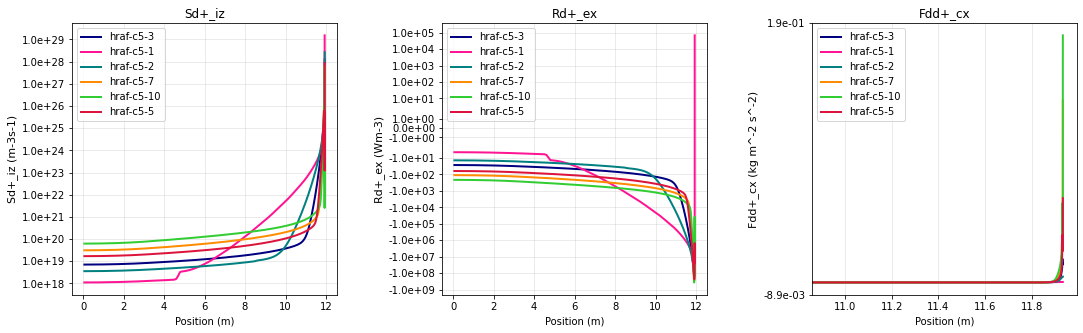

In [ ]:
deck.plot()

In [ ]:
deck_key = "hraf-c5"

deck_cases = [x for x in db.cases if deck_key in x]

# case.ds["NVd+"].isel(t=-1).squeeze().values[-2]
deck_cases.sort()
deck_cases

['hraf-c5-1', 'hraf-c5-10', 'hraf-c5-2', 'hraf-c5-3', 'hraf-c5-5', 'hraf-c5-7']

KeyError: 'density_source_multiplier_d+'

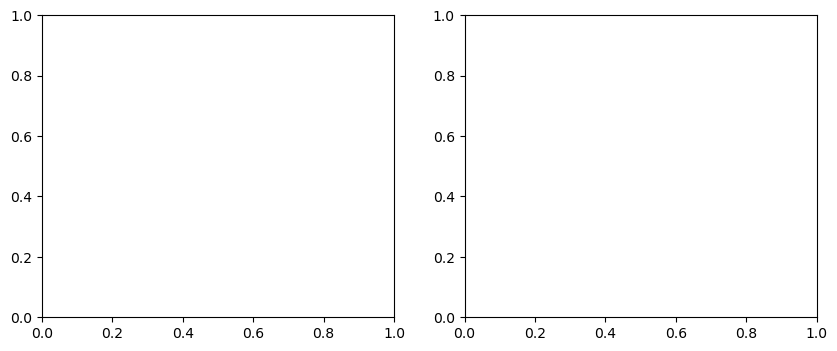

In [ ]:
ds = case.ds
o = case.ds.options

fig, axes = plt.subplots(1,2, figsize=(5*2,4), dpi = 100)

upstream_dens = ds["Nd+"].isel(y=1)
# target_dens = o["d+"]["density_upstream"]
multiplier = ds["density_source_multiplier_d+"]
total_source = (ds["Sd+_src"] * ds["dV"]).sum("y")

ax = axes[0]
upstream_dens.plot(ax = ax, c = "k", label = "Upstream density")
# ax.hlines(y = target_dens, xmin = upstream_dens["t"][0], xmax = upstream_dens["t"][-1], color = "r", label = "Target")
ax.set_title("Density")
ax.legend(); ax.grid()

ax = axes[1]
multiplier.plot(ax = ax, c = "k", label = "Source multiplier")
ax.grid()


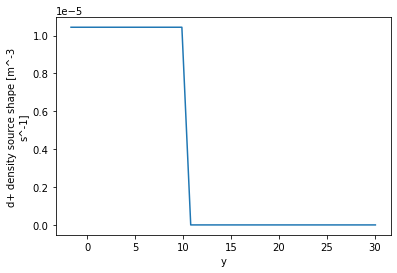

In [ ]:
(self.ds["density_source_shape_d+"]).plot()

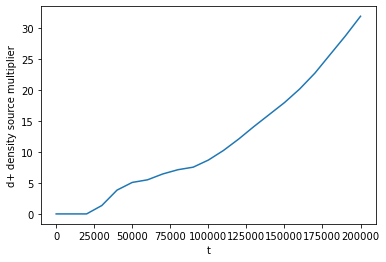

In [ ]:
self.ds["density_source_multiplier_d+"].plot()

>>> System mass balance
- Total in ---------------
- Input ion source = 0.000E+00 [s-1]
- Input neutral source = 0.000E+00 [s-1]
- Ionisation source = 3.418E+21 [s-1]
- Intended recycling source = 4.766E+21 [s-1]
- Total = 3.418E+21 [s-1]

- Total out ---------------
- Sheath ion flux = 4.766E+21 [s-1]
- Sheath neutral flux = -6.622E+20 [s-1]
- Recombination source = -8.727E-08 [s-1]
- Total = 4.104E+21 [s-1]

- Difference:
---> -6.858E+20 [s-1] (-20.063%)


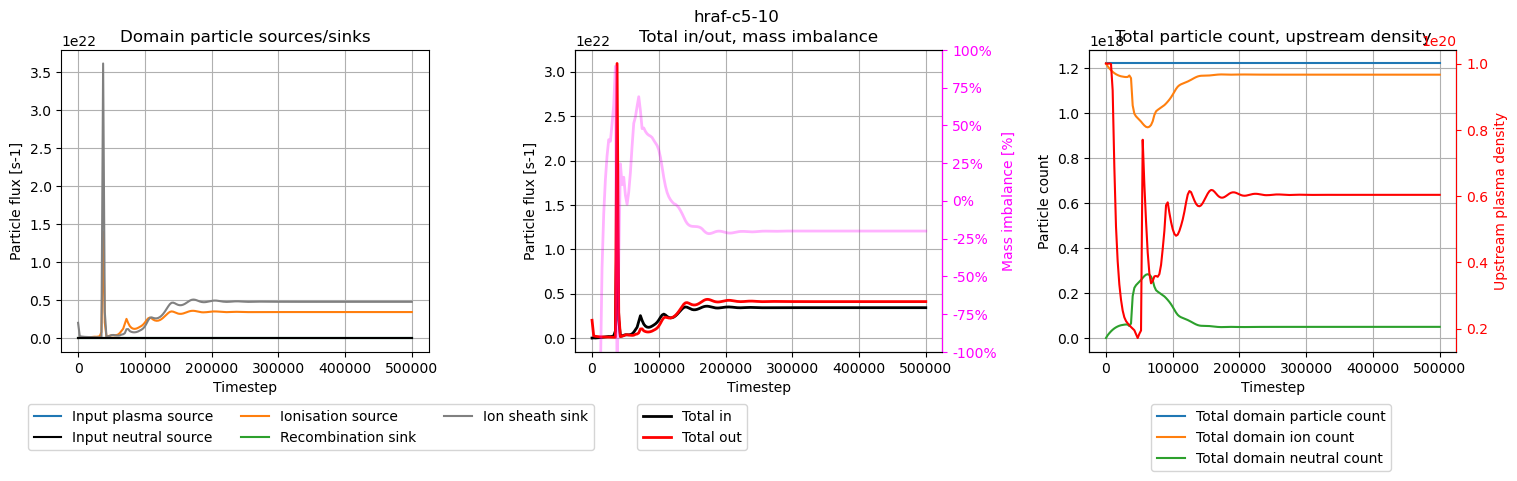

In [ ]:
o = case.ds.options
ds = case.ds
meta = case.ds.metadata
MYG = meta["MYG"]
mass_i = constants("mass_p") * 2
 
# ----- Recycling
recycle_multiplier = float(o["d+"]["recycle_multiplier"])

# ----- Boundary flux
sheath_area = ds.da[-2]
sheath_ion_flux = ds["NVd+"].isel(y=-MYG) * sheath_area / mass_i
sheath_neutral_flux = ds["NVd"].isel(y=-MYG) * sheath_area / mass_i
intended_recycle_flux = sheath_ion_flux * recycle_multiplier

# ----- Domain integrals
integrals = dict()
for param in ["Sd+_src", "Sd_src", "Sd+_iz", "Sd+_rec", "SNd+", "Nd+", "Nd"]:
    if param in ds.data_vars:
        integrals[param] = (ds[param].isel(y = slice(MYG,-MYG)) * ds["dV"].isel(y = slice(MYG,-MYG))).sum("y")
    else:
        integrals[param] = np.zeros_like(sheath_ion_flux)

# ----- Total fluxes
total_in = integrals["Sd+_src"] + integrals["Sd_src"] + integrals["Sd+_iz"]
total_out = sheath_ion_flux + sheath_neutral_flux + (integrals["Sd+_rec"] * -1)
total_balance = total_in - total_out
frac_balance = total_balance / total_in
total_ions = integrals["Nd+"]
total_neutrals = integrals["Nd"]
total_particles = total_ions + total_neutrals
avg_plasma_dens = integrals["Nd+"] / ds["dV"].sum()
upstream_dens = ds["Nd+"].isel(y = MYG-1)

print(">>> System mass balance")
print("- Total in ---------------")
print(f"- Input ion source = {integrals['Sd+_src'][-1]:.3E} [s-1]")
print(f"- Input neutral source = {integrals['Sd_src'][-1]:.3E} [s-1]")
print(f"- Ionisation source = {integrals['Sd+_iz'][-1]:.3E} [s-1]")
print(f"- Intended recycling source = {intended_recycle_flux[-1]:.3E} [s-1]")
print(f"- Total = {total_in[-1]:.3E} [s-1]")
print("\n- Total out ---------------")
print(f"- Sheath ion flux = {sheath_ion_flux[-1]:.3E} [s-1]")
print(f"- Sheath neutral flux = {sheath_neutral_flux[-1]:.3E} [s-1]")
print(f"- Recombination source = {integrals['Sd+_rec'][-1]:.3E} [s-1]")
print(f"- Total = {total_out[-1]:.3E} [s-1]")
print(f"\n- Difference:")
print(f"---> {total_balance[-1]:.3E} [s-1] ({total_balance[-1]/total_in[-1]:.3%})")

fig, axes = plt.subplots(1,3, figsize=(18,4), dpi = 100)
fig.suptitle(case.name)
fig.subplots_adjust(wspace=0.4)
t = ds.coords["t"]


ax = axes[0]
ax.set_title("Domain particle sources/sinks")
ax.plot(t, integrals["Sd+_src"], label = "Input plasma source")
ax.plot(t, integrals["Sd_src"], label = "Input neutral source", c = "k", zorder = 100)
ax.plot(t, integrals["Sd+_iz"], label = "Ionisation source")
ax.plot(t, integrals["Sd+_rec"], label = "Recombination sink")
ax.plot(t, sheath_ion_flux, ls = "-", c = "grey", label = "Ion sheath sink")
ax.set_ylabel("Particle flux [s-1]")

ax = axes[1]
ax.set_title("Total in/out, mass imbalance")
ax.plot(t, total_in, lw = 2, ls = "-", c = "k", label = "Total in")
ax.plot(t, total_out, lw = 2, ls = "-", c = "r", label = "Total out")
ax.set_ylabel("Particle flux [s-1]")

ax2 = ax.twinx()
ax2.plot(t, frac_balance, lw = 2, alpha = 0.3, ls = "-", c = "magenta", label = "Imbalance")
ax2.set_ylim(-1,1)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.0%}"))
ax2.set_ylabel("Mass imbalance [%]", c = "magenta")
ax2.spines["right"].set_color("magenta")
ax2.yaxis.label.set_color("magenta")
ax2.tick_params(axis="y", colors = "magenta")

ax = axes[2]
ax.set_title("Total particle count, upstream density")
ax.plot(t, integrals["Nd"] + integrals["Nd+"], label = "Total domain particle count")
ax.plot(t, integrals["Nd+"], label = "Total domain ion count")
ax.plot(t, integrals["Nd"], label = "Total domain neutral count")
ax.set_ylabel("Particle count")

ax2 = ax.twinx()
ax2.plot(t, upstream_dens, c = "r", ls = "-")
ax2.set_ylabel("Upstream plasma density")
ax2.spines["right"].set_color("red")
ax2.yaxis.label.set_color("red")
ax2.tick_params(axis="y", colors = "red")

for ax in axes:
    ax.grid(which = "both")
    ax.set_xlabel("Timestep")


axes[0].legend(loc="upper left", bbox_to_anchor = (-0.11,-0.15), ncol = 3)
axes[1].legend(loc="upper left", bbox_to_anchor = (0.15,-0.15), ncol = 1)
axes[2].legend(loc="upper left", bbox_to_anchor = (0.15,-0.15), ncol = 1)

>>> System mass balance
- Total in ---------------
- Input ion source = 0.000E+00 [s-1]
- Input neutral source = 0.000E+00 [s-1]
- Ionisation source = 2.770E+21 [s-1]
- Intended recycling source = 2.770E+21 [s-1]
- Total = 2.770E+21 [s-1]

- Total out ---------------
- Sheath ion flux = 2.700E+24 [s-1]
- Sheath neutral flux = 0.000E+00 [s-1]
- Recombination source = -1.192E+19 [s-1]
- Total = 2.700E+24 [s-1]

- Difference:
---> -2.697E+24 [s-1] (-97364.397%)


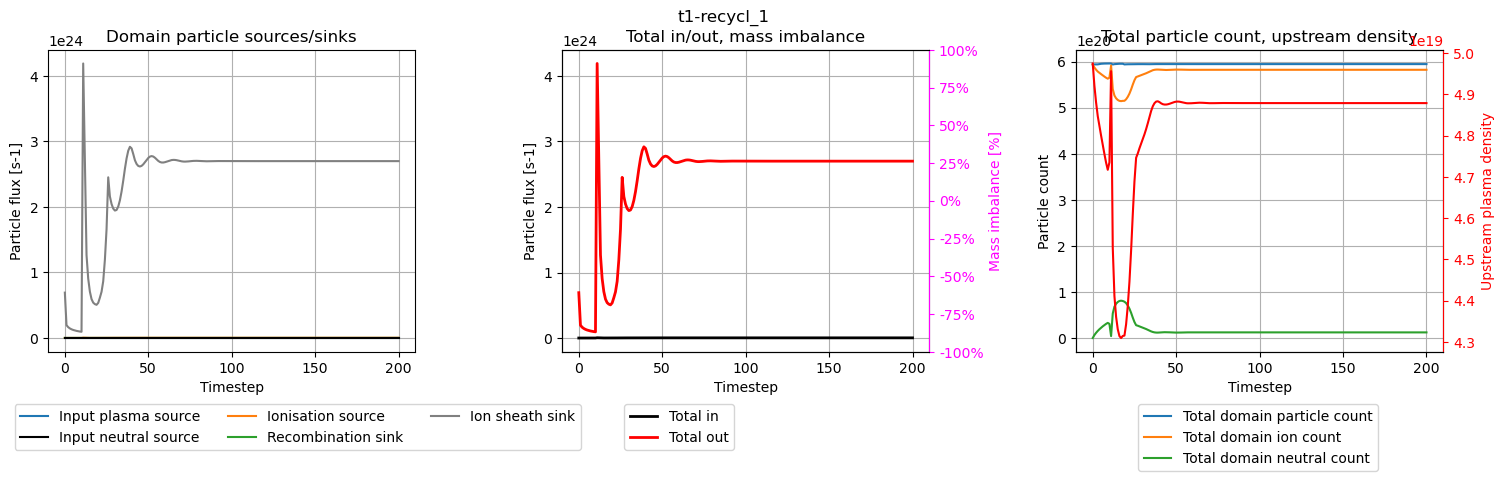

In [ ]:
import analysis
analysis.Case(r"/ssd_scratch/hcases/mbtest/t1-recycl_1").mass_balance_hermes()